In [1]:
import os 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np
import os 
from tqdm import tqdm
import cv2 as cv
import random
from tensorflow.keras.layers import *
from tensorflow.keras.applications import ResNet50

# EDA

In [2]:
image_size = (128,128)
image_data = []
label_data = []
classes = {
    0:"Happy", 1:"Neutral", 2:"Sad"
}

In [3]:
label = 0
for i in os.listdir(os.path.join("Data")):
    print(i, label)
    for j in tqdm(os.listdir(os.path.join("Data", i))):
        try: 
            img = cv.imread(os.path.join("Data", i,j))
            img = cv.resize(img, image_size)
            image_data.append(img)
            label_data.append(label)
        except:
            pass
    label += 1

Happy 0


100%|███████████████████████████████████████████████████████████████████████████████| 903/903 [00:03<00:00, 252.62it/s]


Neutral 1


100%|███████████████████████████████████████████████████████████████████████████████| 736/736 [00:02<00:00, 315.57it/s]


Sad 2


100%|█████████████████████████████████████████████████████████████████████████████| 1042/1042 [00:03<00:00, 341.02it/s]


In [4]:
image_data = np.array(image_data)
label_data = np.array(label_data)
print(image_data.shape, label_data.shape)

(2680, 128, 128, 3) (2680,)


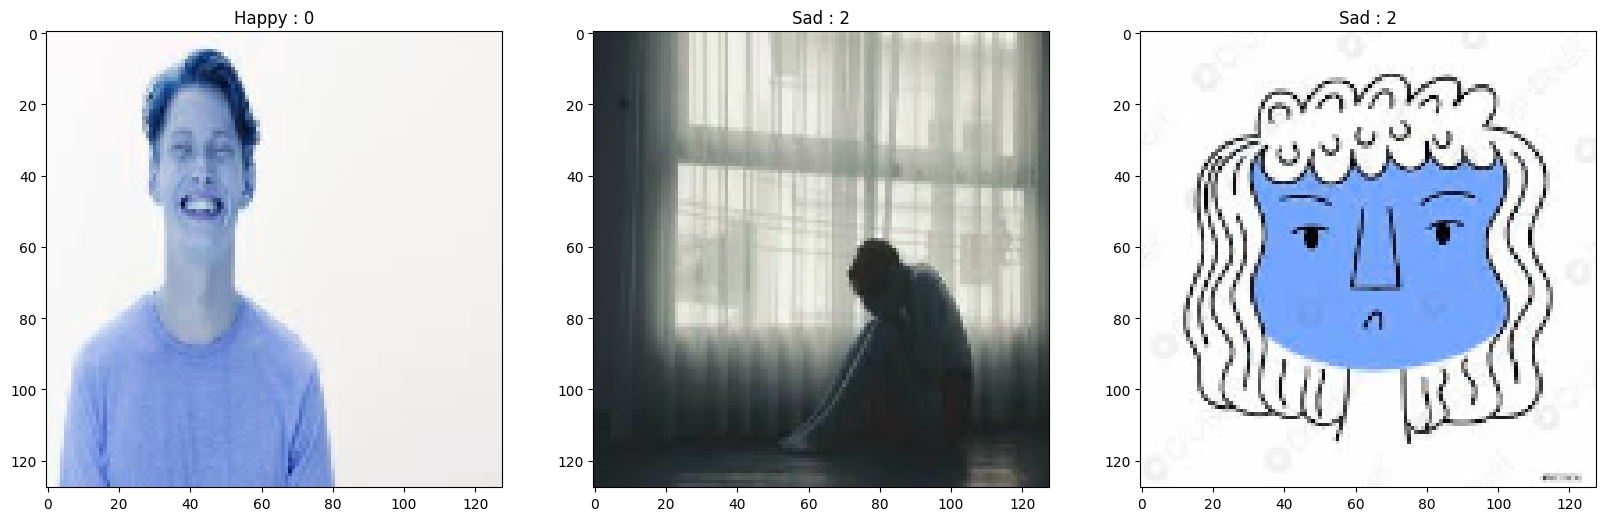

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
for i in range(3): 
    ran = random.randrange(image_data.shape[0])
    axes[i].imshow(image_data[ran])
    axes[i].set_title(f"{classes[label_data[ran]]} : {label_data[ran]}")

In [6]:
# Data processing
normalized_image = image_data / 255.0
normalized_image.shape

(2680, 128, 128, 3)

# Model

In [7]:
from tensorflow.keras.applications import ResNet50

In [8]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in base_model.layers:
    layer.trainable = False
# for layer in base_model.layers[:-20]:  # Freeze all layers except the last 20
#     layer.trainable = False

In [9]:
model = tf.keras.Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')  # For classification
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ ?                           │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(x = image_data, y = label_data, epochs = 20, batch_size = 32, validation_split = 0.2)

Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.4540 - loss: 8.2375 - val_accuracy: 0.3041 - val_loss: 1.1027
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.5843 - loss: 0.8990 - val_accuracy: 0.4478 - val_loss: 0.9874
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.6446 - loss: 0.7752 - val_accuracy: 0.4328 - val_loss: 1.1435
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.6664 - loss: 0.7294 - val_accuracy: 0.4179 - val_loss: 1.2307
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.6976 - loss: 0.6024 - val_accuracy: 0.5597 - val_loss: 1.0219
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.7284 - loss: 0.5678 - val_accuracy: 0.4272 - val_loss: 1.5306
Epoch 7/20
54/67 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.7711 - loss: 0.5258

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()